In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
path_xlsx = "data/-5305657631232964198delos_question_data_v2.xlsx"

In [4]:
df =pd.read_excel(path_xlsx)

# EDA

In [5]:
df.head()

,Days of production,Pond Identifier,Temperature in the Morning,Temperature n the Afternoon,Temperature in the Evening,Feed per day (kg of shrimp feed),TAN ppm,Phosphate ppm,Phytoplankton cells/ml
0,1,A1,29,30,29,3.5,NaN,NaN,NaN
1,2,A1,30,32,29,3.5,NaN,NaN,NaN
2,3,A1,29,33,31,4,0.606,0.036,3000.0
3,4,A1,29,32,31,4,NaN,NaN,NaN
4,5,A1,30,30,28,4.5,NaN,NaN,NaN


In [6]:
df.isna().sum()

Days of production                    0
Pond Identifier                       0
Temperature in the Morning            0
Temperature n the Afternoon           0
Temperature in the Evening            0
Feed per day (kg of shrimp feed)      0
TAN ppm                             641
Phosphate ppm                       641
Phytoplankton cells/ml              641
dtype: int64

In [7]:
df.describe()

,Days of production,Temperature in the Morning,TAN ppm,Phosphate ppm,Phytoplankton cells/ml
count,889.000000,889.000000,248.000000,248.000000,248.000000
mean,45.291339,28.692913,0.735968,0.177581,9612.096774
std,26.229229,0.909884,0.505391,0.106387,4680.809175
min,1.000000,26.000000,0.113000,0.018000,2000.000000
25%,23.000000,28.000000,0.334500,0.107750,5500.000000
50%,45.000000,29.000000,0.619500,0.158500,10000.000000
75%,67.000000,29.000000,0.972250,0.226000,12500.000000
max,94.000000,31.000000,2.774000,0.581000,23500.000000


In [8]:
df.dtypes

Days of production                    int64
Pond Identifier                      object
Temperature in the Morning            int64
Temperature n the Afternoon          object
Temperature in the Evening           object
Feed per day (kg of shrimp feed)     object
TAN ppm                             float64
Phosphate ppm                       float64
Phytoplankton cells/ml              float64
dtype: object

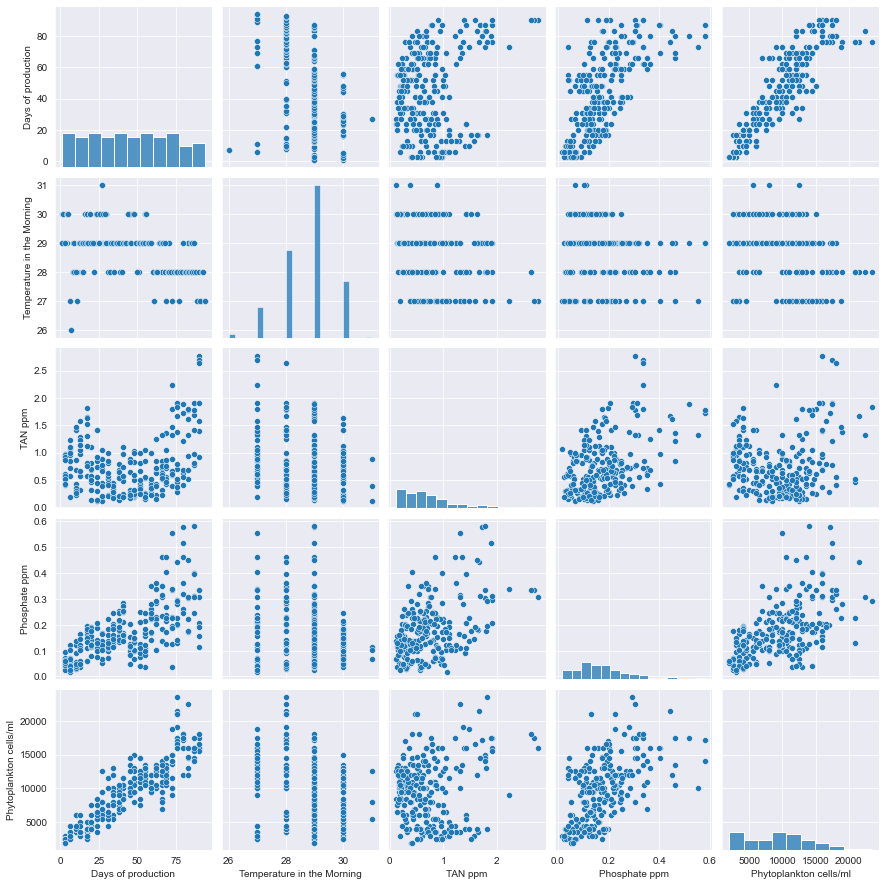

In [9]:
sns.pairplot(df)

# Cleaning

In [10]:
clean_df : pd.DataFrame
clean_df = df.dropna() # Drop row if have null value

In [11]:
df.isna().sum()

Days of production                    0
Pond Identifier                       0
Temperature in the Morning            0
Temperature n the Afternoon           0
Temperature in the Evening            0
Feed per day (kg of shrimp feed)      0
TAN ppm                             641
Phosphate ppm                       641
Phytoplankton cells/ml              641
dtype: int64

In [12]:
clean_df.head()

,Days of production,Pond Identifier,Temperature in the Morning,Temperature n the Afternoon,Temperature in the Evening,Feed per day (kg of shrimp feed),TAN ppm,Phosphate ppm,Phytoplankton cells/ml
2,3,A1,29,33,31,4,0.606,0.036,3000.0
5,6,A1,27,27,27,4.5,0.837,0.061,3500.0
9,10,A1,28,29,28,7,0.871,0.121,3500.0
12,13,A1,29,31,29,8.5,1.288,0.164,3500.0
16,17,A1,29,32,31,10.5,1.649,0.180,3500.0


In [13]:
clean_df.groupby(['Pond Identifier']).count()

,Days of production,Temperature in the Morning,Temperature n the Afternoon,Temperature in the Evening,Feed per day (kg of shrimp feed),TAN ppm,Phosphate ppm,Phytoplankton cells/ml
Pond Identifier,,,,,,,,
A1,22,22,22,22,22,22,22,22
A2,26,26,26,26,26,26,26,26
A3,22,22,22,22,22,22,22,22
A4,26,26,26,26,26,26,26,26
A5,26,26,26,26,26,26,26,26
A6,26,26,26,26,26,26,26,26
A7,26,26,26,26,26,26,26,26
A8,22,22,22,22,22,22,22,22
A9,26,26,26,26,26,26,26,26


In [14]:
clean_df['Feed per day (kg of shrimp feed)'] = clean_df['Feed per day (kg of shrimp feed)'].astype('float')

ValueError: could not convert string to float: '-'

In [15]:
clean_df['Temperature in the Evening'] = clean_df['Temperature in the Evening'].astype('int')
clean_df['Temperature n the Afternoon'] = clean_df['Temperature n the Afternoon'].astype('int')

D:\PROJECT\PRIVATE\ds-test\delos-aqua-test\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\PROJECT\PRIVATE\ds-test\delos-aqua-test\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
clean_df = clean_df[clean_df['Feed per day (kg of shrimp feed)']!='-'] # drop data object -

In [17]:
clean_df['Feed per day (kg of shrimp feed)'] = clean_df['Feed per day (kg of shrimp feed)'].astype('float')

In [18]:
index = clean_df.columns
list_index = index.values
list_index =list(list_index)
print(list_index)
ids_select = [0,1,2,3,5,6,7,8]
selected_data = [list_index[ids] for ids in ids_select]
print(selected_data)

['Days of production', 'Pond Identifier', 'Temperature in the Morning', 'Temperature n the Afternoon', 'Temperature in the Evening', 'Feed per day (kg of shrimp feed)', 'TAN ppm', 'Phosphate ppm', 'Phytoplankton cells/ml']
['Days of production', 'Pond Identifier', 'Temperature in the Morning', 'Temperature n the Afternoon', 'Feed per day (kg of shrimp feed)', 'TAN ppm', 'Phosphate ppm', 'Phytoplankton cells/ml']


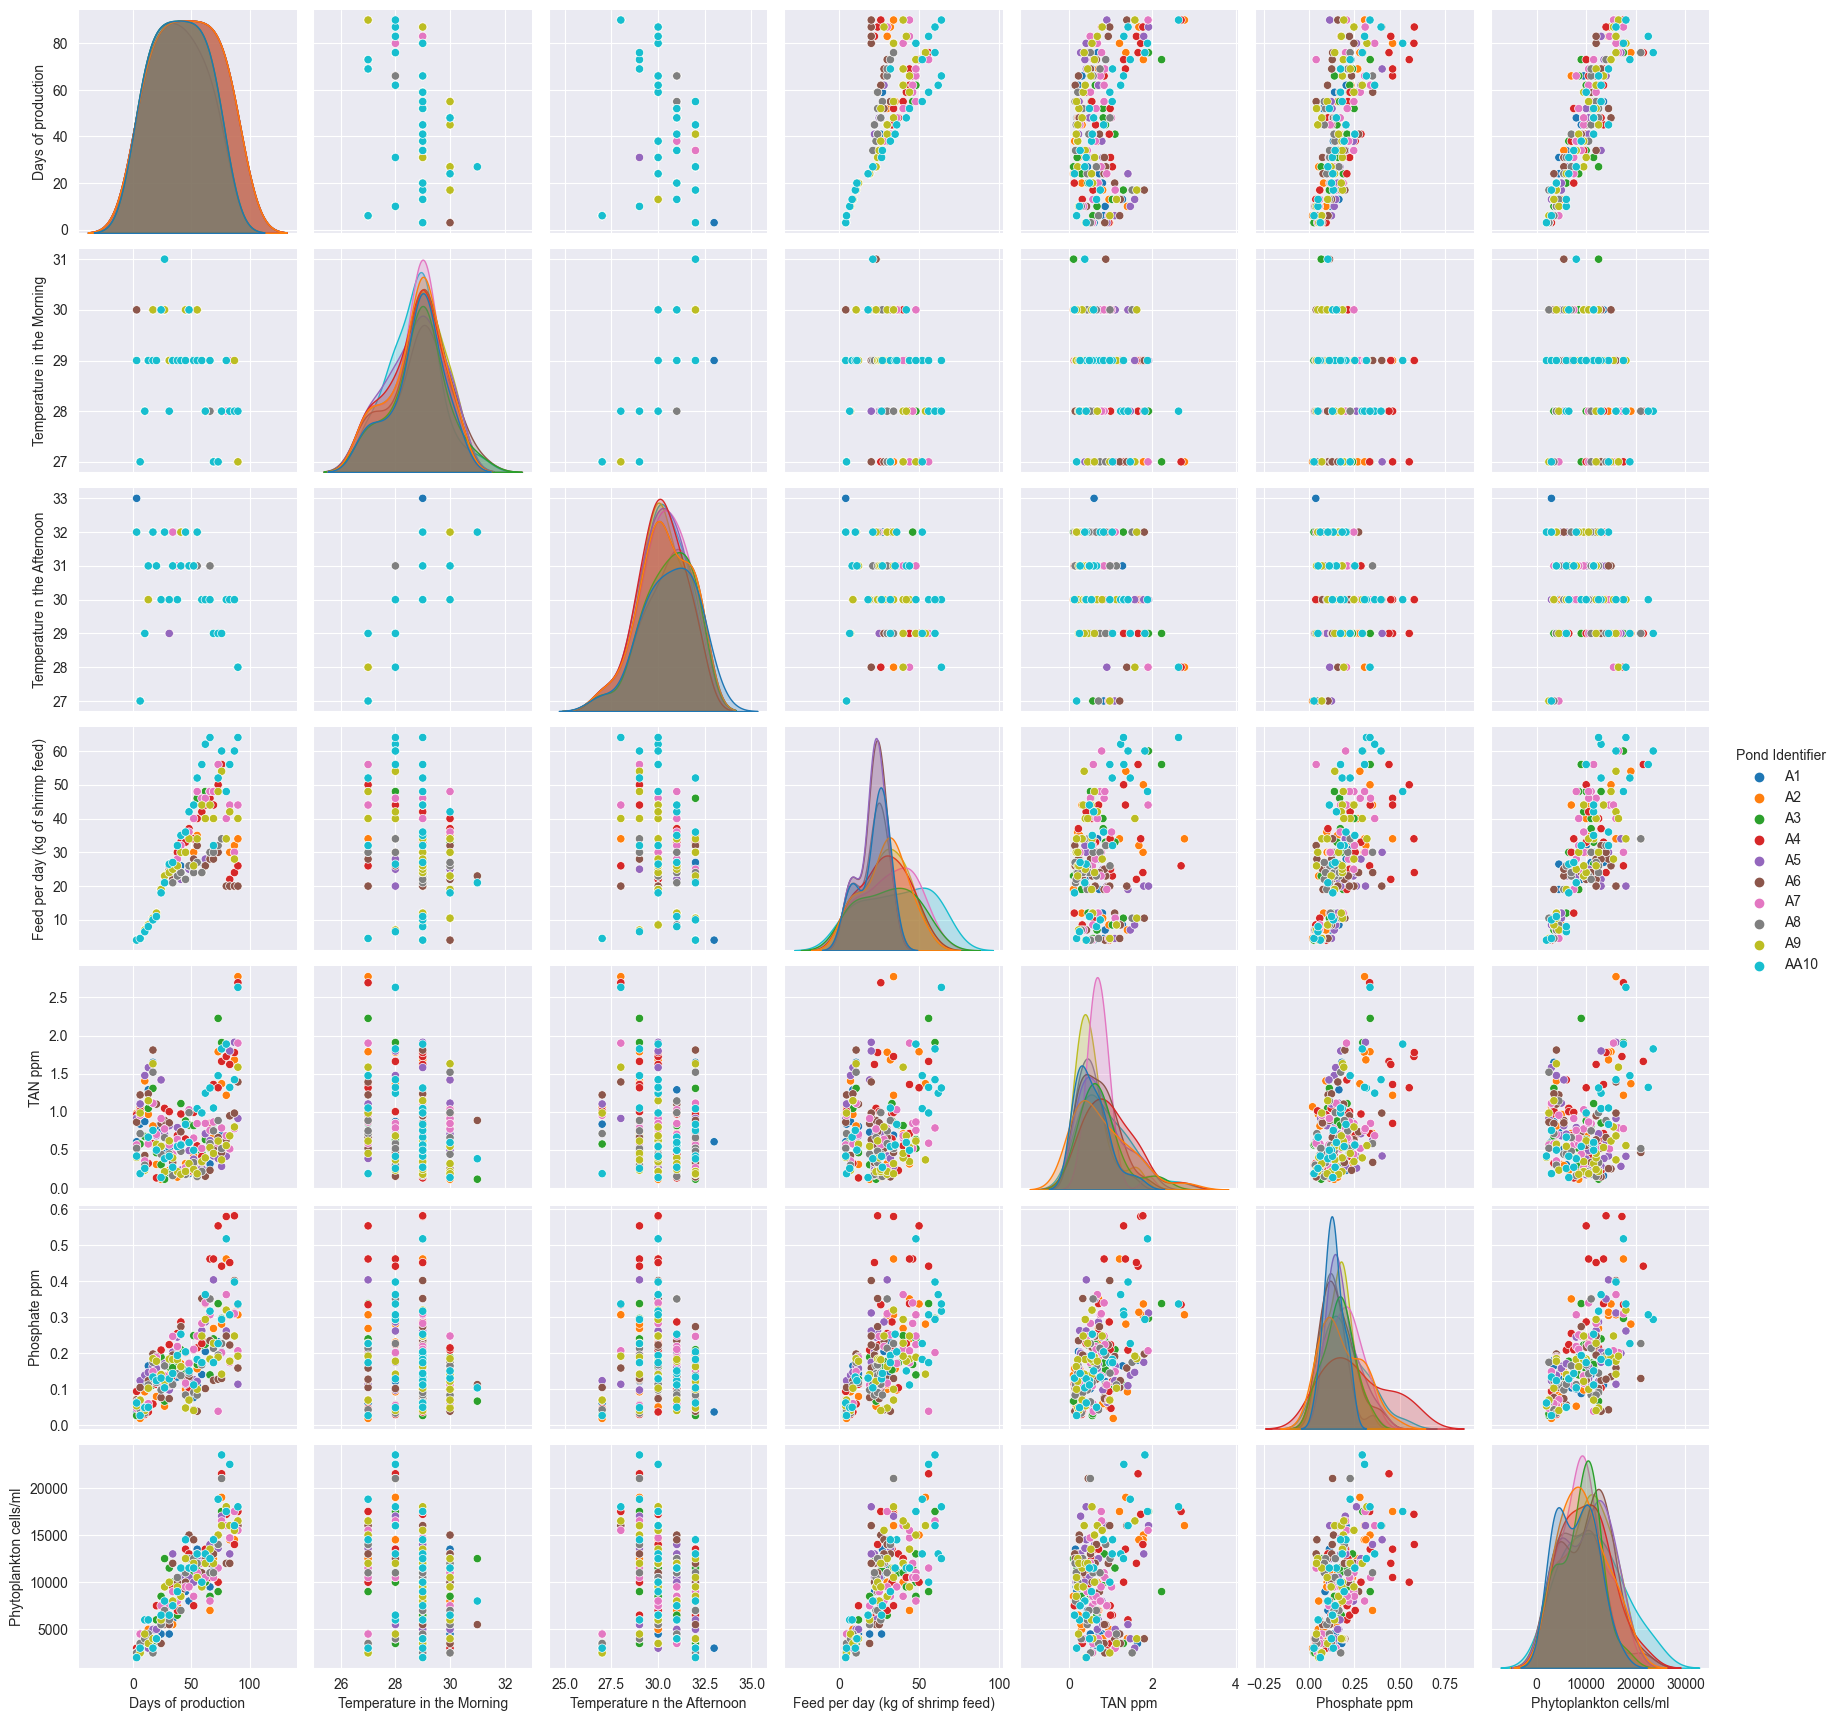

In [19]:
sns.pairplot(clean_df[selected_data],hue='Pond Identifier')

Berdasarkan grafik diatas, dapat dilihat bahwa tidak ada unsur pengelompokan berdasarkan "Pond Identifier" dalam data. Namun setiap keterkaitan dalam variabel dominan linear. Untuk lebih memastikannya dapat dilihat pada heatmap dari matrix correlation dibawah ini.

<AxesSubplot:>

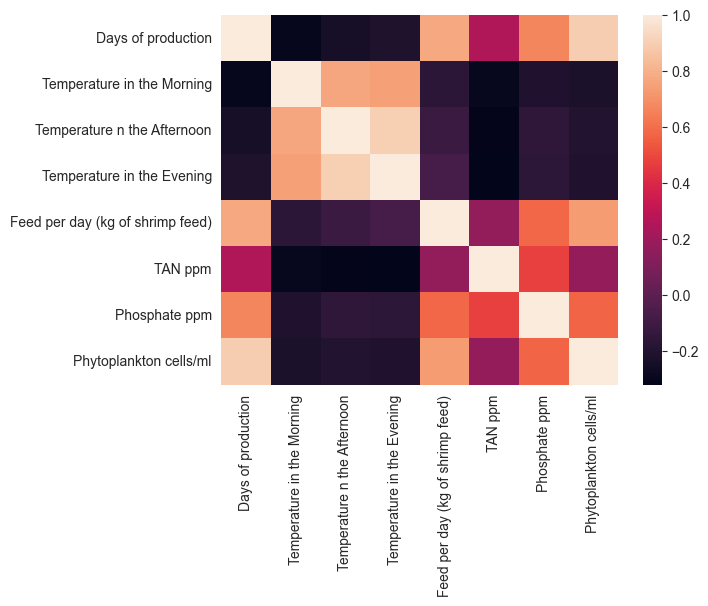

In [20]:
sns.heatmap(clean_df.corr())

Terlihat bahwa hari-ke hari Phosphat ppm memiliki hubungan linear positif yang besar yakni -+ 0.8 artinya jumlah phosat ppm mengalami kenaikan disetiap harinya. pada Tan Ppm pun demikian walaupun tidak begitu besar yakkni -+ 0.2 tapi dapat dikatakan tan ppm mengalami kenaikkan pula. Pada paramaeter lain pun menunjukkan hubungan positif diantara mereka, kecuali Temperature, terlihat hubungan parameter ini dengan parameter lainnya menunjukkan hubungan negatif dimana naiknya suhu mengakibatkkan peurunan pada parameter lainnya.

secara garis besar rata rata setiap parameter memiliki hubungan linear terhadap TAN ppm dan Phospate



# Prediction TAN ppm and Phospate ppm

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, HuberRegressor
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [24]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

Karena tidak besarnya hubungan linear temperature terhadap Tan PPM dan Posphate PPM maka coloumn itu akan di drop

In [35]:
clean_df_ = clean_df.drop(['Pond Identifier','Temperature n the Afternoon','Temperature in the Evening','Temperature in the Morning'],axis=1)

NO 3 ML TECHNIQUE

Untuk melakukan prediksi Tan PPM dan Posphate PPM berdasarkan fiture yang ada, saya menggunakan metode ElasticNet dan terintegrasi dengan MLFlow untuk memonitoring hasil evaluasi setiap perubahan hyperparameter.

In [36]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(clean_df_)

In [37]:
train_x = train.drop(["Phosphate ppm","TAN ppm"], axis=1)
test_x = test.drop(["Phosphate ppm","TAN ppm"], axis=1)
train_y = train[["Phosphate ppm","TAN ppm"]]
test_y = test[["Phosphate ppm","TAN ppm"]]

# train_y = train[["TAN ppm"]]
# test_y = test[["TAN ppm"]]

# train_y = train[["Phosphate ppm"]]
# test_y = test[["Phosphate ppm"]]

alpha =  0.5
l1_ratio =  0.5

with mlflow.start_run():
    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    # lr = HuberRegressor(epsilon=1.35,alpha=0.000002)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)

    (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

    print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
    print("  RMSE: %s" % rmse)
    print("  MAE: %s" % mae)
    print("  R2: %s" % r2)

    mlflow.log_param("alpha", alpha)
    mlflow.log_param("l1_ratio", l1_ratio)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    # Model registry does not work with file store
    if tracking_url_type_store != "file":

        # Register the model
        # There are other ways to use the Model Registry, which depends on the use case,
        # please refer to the doc for more information:
        # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
    else:
        mlflow.sklearn.log_model(lr, "model")

Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.29997708103926424
  MAE: 0.19777812889432167
  R2: 0.23007508844490615


In [38]:
train_x.values[1,:]

array([  27.,   23., 9500.])

In [39]:
lr.predict([train_x.values[5,:]])

D:\PROJECT\PRIVATE\ds-test\delos-aqua-test\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


array([[0.09867766, 0.71098805]])

In [40]:
train_y.values[5,:]

array([0.148, 1.112])